In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, 
                          n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=10)

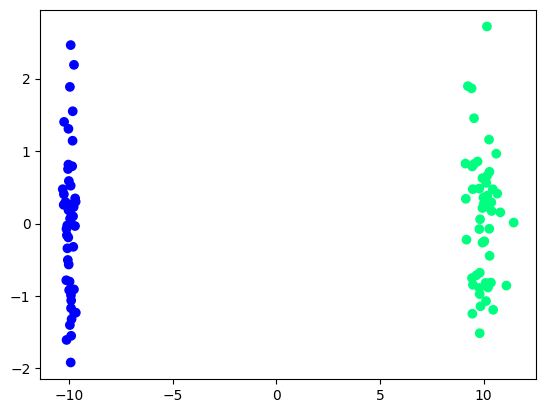

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

In [15]:
class Perceptron():

    def __init__(self, lr, epochs):

        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs

    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            idx = np.random.randint(X_train.shape[0])

            y_hat = sigmoid(np.dot(X_train[idx], weights))

            weights = weights - np.dot(self.lr, (y_train[idx] - y_hat)) 
        
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]

        print(f"Coef_: {self.coef_} | Intercept_: {self.intercept_}")
    
    def predict(self, X_test):

        y_pred = sigmoid(np.dot(X_test, self.coef_))

        return y_pred

In [16]:
percp = Perceptron(lr=0.01, epochs=100)

In [50]:
percp.fit(X, y)

Coef_: [1.00004417 1.00004417] | Intercept_: 1.0000441672046936


In [52]:
y_pred = percp.predict(X_test)

In [53]:
y_pred

array([2.54559714e-04, 2.30786970e-05, 5.50783674e-05, 9.99752241e-01,
       9.99990637e-01, 8.41491773e-05, 8.58562885e-05, 9.99980182e-01,
       9.99949529e-01, 9.99952592e-01, 9.99968181e-01, 6.06300853e-05,
       9.99966269e-01, 9.99982749e-01, 2.08129335e-05, 9.99947169e-01,
       1.44846807e-04, 4.02302148e-05, 1.83172010e-05, 9.99869771e-01])

In [54]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9999999602556694

In [55]:
m = -(percp.coef_[0] / percp.coef_[1])
b = -(percp.intercept_ / percp.coef_[1])

In [56]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

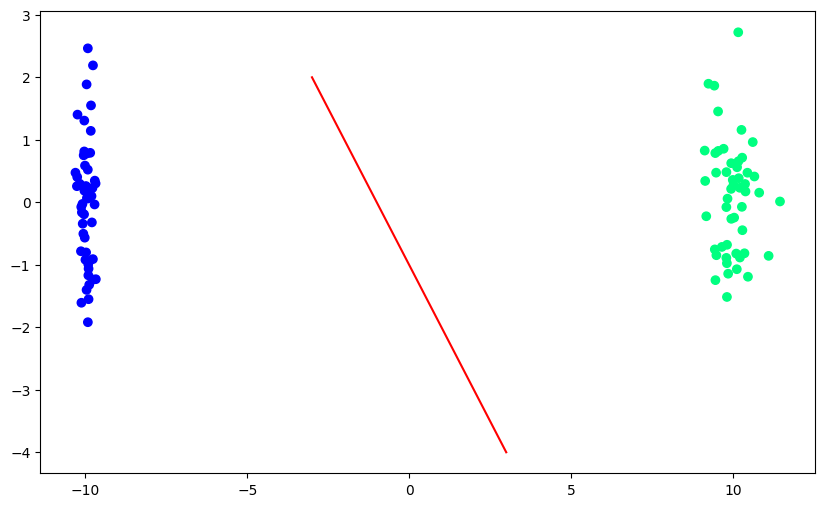

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="r")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")
plt.show()

In [58]:
def step(z):

    return 1 if z>0 else 0

In [59]:
class perceptron_step():

    def __init__(self, lr, epochs):

        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            idx = np.random.randint(X_train.shape[1])

            y_hat = step(np.dot(X_train[idx], weights))

            weights = weights - (np.dot(self.lr, (y_train[idx] - y_hat))) * X_train[idx]
        
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]

        print(f"Coef_: {self.coef_}, Intercept_: {self.intercept_}")
    
    def predict(self, X_test):

        y_pred = step(np.dot(X_test, self.coef_))

        return y_pred

In [60]:
percp_step = perceptron_step(lr=0.01, epochs=100)

In [61]:
percp_step.fit(X, y)

Coef_: [1. 1.], Intercept_: 1.0


In [62]:
step(0)

0

In [63]:
m1 = - (percp_step.coef_[0] / percp_step.coef_[1])
b1 = - (percp_step.intercept_ / percp_step.coef_[1])

In [64]:
x_input_1 = np.linspace(-3, 3, 100)
y_input_1 = m1 * x_input_1 * b1

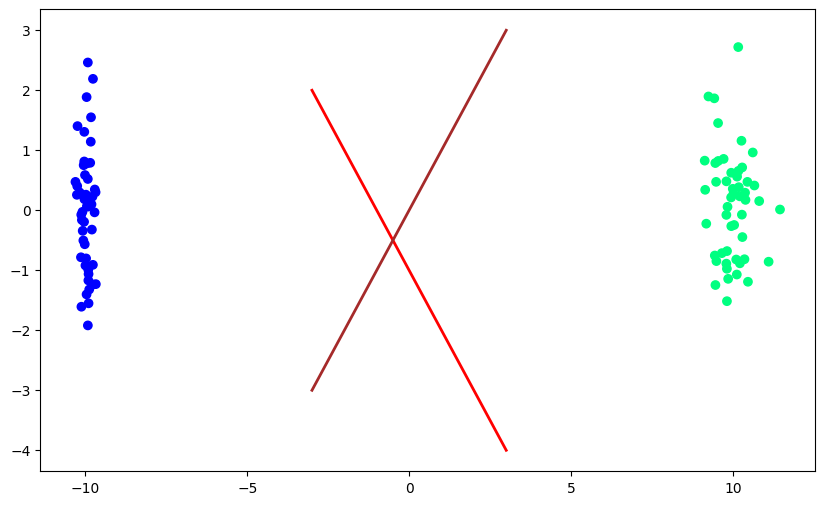

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="r", linewidth=2)
plt.plot(x_input_1, y_input_1, color="brown", linewidth=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X, y)

LogisticRegression()

In [82]:
m2 = -(lg.coef_[0][0] / lg.coef_[0][1])
b2 = -(lg.intercept_ / lg.coef_[0][1])

In [83]:
x_inputsk = np.linspace(-3, 3, 100)
y_inputsk = m2 * x_inputsk + b2

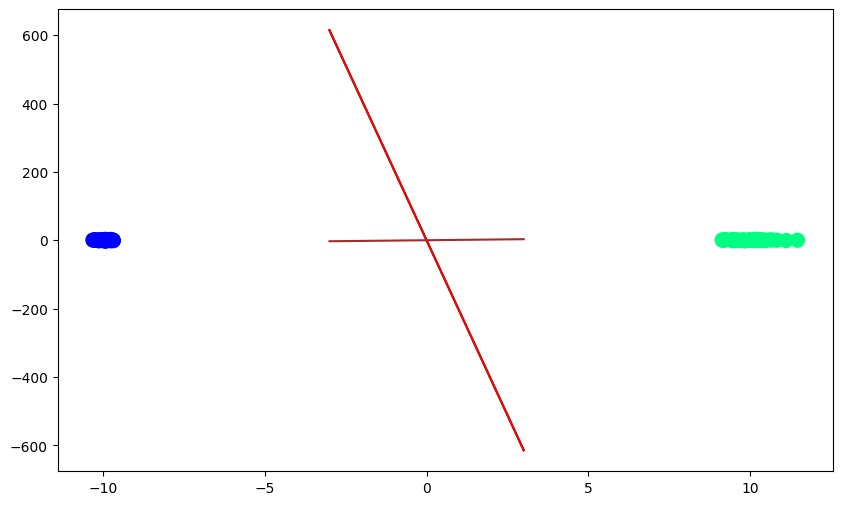

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(x_inputsk, y_inputsk, color="black")
plt.plot(x_input, y_input, color="r")
plt.plot(x_input_1, y_input_1, color="brown")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.show()